In [1111]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

    

In [1112]:
import pandas as pd

datapath = "/Users/tuanle/DynamicPricing/Data/"

Ha_Noi = pd.read_csv(datapath+"HaNoi_1month_LW_WeatherTest.csv")
#Add an additional column into the table
sLength = len(Ha_Noi['accept_rate'])
Ha_Noi['accept_rate_timeT'] = pd.Series(Ha_Noi['accept_rate'], index=Ha_Noi.index)
#Shift the entries in the accept_rate column upward
Ha_Noi.accept_rate = Ha_Noi.accept_rate.shift(-1)

Ha_Noi = Ha_Noi.dropna(subset = ["longwait_percent4"])
Ha_Noi = Ha_Noi.dropna(subset=["accept_rate"])
Ha_Noi = Ha_Noi.dropna(subset = ["longwait_percent2"])
df2 = pd.DataFrame(Ha_Noi)

# threshold for request
# df2 = df2.drop(df2[(df2.request < 15)].index)
#Dong_Da.describe()

In [1113]:
corr_matrix = Ha_Noi.corr()
corr_matrix["accept_rate"].sort_values(ascending=False)

accept_rate                         1.000000
accept_rate_timeT                   0.752991
request                            -0.197986
long_waiting                       -0.619737
longwait_percent1                  -0.732090
Weather Weight_Longwait_percent4   -0.735139
Weather Weight_Longwait_percent2   -0.735758
longwait_percent4                  -0.739608
longwait_percent2                  -0.740427
longwait_percent3                  -0.741485
Name: accept_rate, dtype: float64

In [1114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

train_set, test_set = train_test_split(Ha_Noi, test_size=0.2, random_state = random.randint(20, 200))
Xtrain = train_set['longwait_percent2'].reshape(-1,1)
Ytrain = train_set['accept_rate'].reshape(-1,1)

Xtrain2 = train_set['Weather Weight_Longwait_percent2'].reshape(-1,1)
Xtest2 = test_set['Weather Weight_Longwait_percent2'].reshape(-1,1)

Xtest = test_set['longwait_percent2'].reshape(-1,1)
Ytest = test_set['accept_rate'].reshape(-1,1)

# Xtrain = train_set[['longwait_percent2', 'accept_rate_timeT']]
# Ytrain = train_set['accept_rate'].reshape(-1,1)

# Xtrain2 = train_set[['Weather Weight_Longwait_percent2', 'accept_rate_timeT']]
# Xtest2 = test_set[['Weather Weight_Longwait_percent2', 'accept_rate_timeT']]

# Xtest = test_set[['longwait_percent2', 'accept_rate_timeT']]
# Ytest = test_set['accept_rate'].reshape(-1,1)




# Linear Regression - ML model

In [1115]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
def modelfit(X,y):
    result = model.fit(Xtrain, Ytrain)
    print("R^2 score is: %.3f" %model.score(Xtrain, Ytrain))
    print(model.coef_)
    print(model.intercept_)


model2 = LinearRegression()
def model2fit(X,y):
    result2 = model2.fit(Xtrain2,Ytrain)
    print("R^2 score is: %.3f"  % model2.score(Xtrain2, Ytrain))
    print(model2.coef_)
    print(model2.intercept_)

modelfit(Xtest, Ytest)
model2fit(Xtest2, Ytest)


R^2 score is: 0.609
[[-0.30636318  0.44559715]]
[ 0.52692666]
R^2 score is: 0.607
[[-0.27156556  0.46778528]]
[ 0.5035651]


# Predict the result using Lin-Reg obtained above

In [1116]:
Accept_rate_prediction = model.predict(Xtest)
Accept_rate_train  = model.predict(Xtrain)

Accept_rate_prediction2 = model2.predict(Xtest2)
Accept_rate_train2 = model2.predict(Xtrain2)



In [1117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#MSE, RMSE and MAE for predicted value of Xtest2 (Accept_rate_prediction2) vs Ytest
lin_mse = mean_squared_error(Ytest, Accept_rate_prediction2)
lin_rmse = np.sqrt(lin_mse) #taking square root of MSE converts the units back to the original units of the output variable
lin_mae = mean_absolute_error(Ytest, Accept_rate_prediction2)
print("Mean Square Error:\t",lin_rmse)

#MSE, RMSE and MAE for predicted value of Xtest (Accept_rate_prediction) vs Ytest
lin_mse2 = mean_squared_error(Ytest, Accept_rate_prediction)
lin_rmse2 = np.sqrt(lin_mse) #taking square root of MSE converts the units back to the original units of the output variable
lin_mae2 = mean_absolute_error(Ytest, Accept_rate_prediction)
print("Mean Square Error:\t",lin_rmse)

lin_reg = LinearRegression()
#Evaluate Lin-Reg algo on the whole training set by cross-validation
scores2 = cross_val_score(lin_reg, Xtrain, Ytrain.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores2 = np.sqrt(-scores2)

#Evaluate Lin-Reg algo on the whole test set by cross-validation
scores4 = cross_val_score(lin_reg, Xtest2, Ytest.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores4 = np.sqrt(-scores4)

#Evaluate Lin-Reg algo on the whole training set by cross-validation
scores3 = cross_val_score(lin_reg, Xtrain2, Ytrain.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores2 = np.sqrt(-scores2)

#Evaluate Lin-Reg algo on the whole test set by cross-validation
scores5 = cross_val_score(lin_reg, Xtest, Ytest.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores2 = np.sqrt(-scores2)

def display_scores(scores):
    # print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard:", scores.std())
    print("Max:", scores.max())
    print("Min:", scores.min())

# display_scores(-scores2)
display_scores(-scores4)

r_squared = r2_score(Ytest, Accept_rate_prediction2) #built-in formula for R^2 
print("R^2:\t", r_squared) 

adjusted_Rsquared = 1 - (1-r_squared)*(len(Xtest)-1)/(len(Xtest)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared) #correct the error when adding more and more independent variables to the linear regression model


# lin_mse = mean_squared_error(Ytrain, Accept_rate_train)
# lin_rmse = np.sqrt(lin_mse)
# print("Mean Squred Error_train:\t", lin_rmse)

Mean Square Error:	 0.0656163697264
Mean Square Error:	 0.0656163697264
Mean: 0.00438508556574
Standard: 0.00790427278714
Max: 0.0618686499078
Min: 4.21178624228e-05
R^2:	 0.582714087048
Adjusted R^2:	 0.580834420774


# Plot of RMSE errors when testing our models on training set vs test set, and comparing the errors in the case of factor 1.3 applied to bad weather vs none

Average RMSE on the training set is: 0.063
Average RMSE on the test set is: 0.068
Average RMSE on the training set is: 0.063
Average RMSE on the test set is: 0.067
Average RMSE on the training set is: 0.061
Average RMSE on the test set is: 0.080
Average RMSE on the training set is: 0.061
Average RMSE on the test set is: 0.091


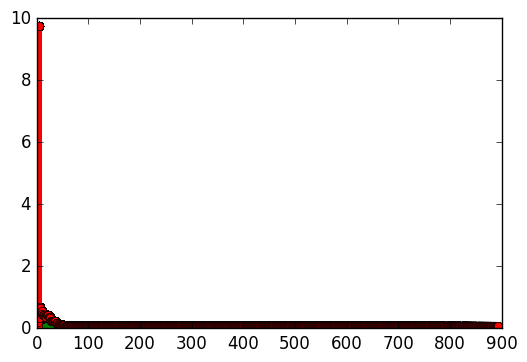

In [1119]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def plot_learning_curves(model):
    train_errors, test_errors = [], []
    for m in range(1, len(Xtrain)):
        model.fit(Xtrain[:m], Ytrain[:m])
        Ytrain_predict = model.predict(Xtrain[:m])
        Ytest_predict = model.predict(Xtest)
        train_errors.append(mean_squared_error(Ytrain_predict, Ytrain[:m]))
        test_errors.append(mean_squared_error(Ytest_predict, Ytest))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
        plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="validation set")
    print("Average RMSE on the training set is: %.3f" %np.mean(np.sqrt(train_errors)))
    print("Average RMSE on the test set is: %.3f" %np.mean(np.sqrt(test_errors)))

def plot_learning_curves2(model):   
    train_errors2, test_errors2 = [], []
    for n in range(1, len(Xtrain)):
        model.fit(Xtrain2[:n], Ytrain[:n])
        Ytrain_predict2 = model.predict(Xtrain2[:n])
        Ytest_predict2 = model.predict(Xtest2)
        train_errors2.append(mean_squared_error(Ytrain_predict2, Ytrain[:n]))
        test_errors2.append(mean_squared_error(Ytest_predict2, Ytest))
        plt.plot(np.sqrt(train_errors2), "g-+", linewidth=2, label="training set")
        plt.plot(np.sqrt(test_errors2), "o-", linewidth=3, label="validation set")
    print("Average RMSE on the training set is: %.3f" %np.mean(np.sqrt(train_errors2)))
    print("Average RMSE on the test set is: %.3f" %np.mean(np.sqrt(test_errors2)))
        

polynomial_regression = Pipeline((("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                                  ("sgd_reg", LinearRegression()),
    ))

        
lin_reg = LinearRegression()
plot_learning_curves(lin_reg)
plot_learning_curves2(lin_reg)
# plot_learning_curves(polynomial_regression)
# plot_learning_curves2(polynomial_regression)

plt.show()








In [1102]:
from sklearn.externals import joblib
filename = 'DP4_WeatherWLT.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest) #R^2 result
print(result)

0.486007997158
